Chapter 1

In [2]:
import reservoirpy as rpy 
import numpy as np
import matplotlib.pyplot as plt


rpy.verbosity(0)
rpy.set_seed(42)

In [3]:
from reservoirpy.nodes import Reservoir

reservoir = Reservoir(100, lr=0.5, sr=0.9)

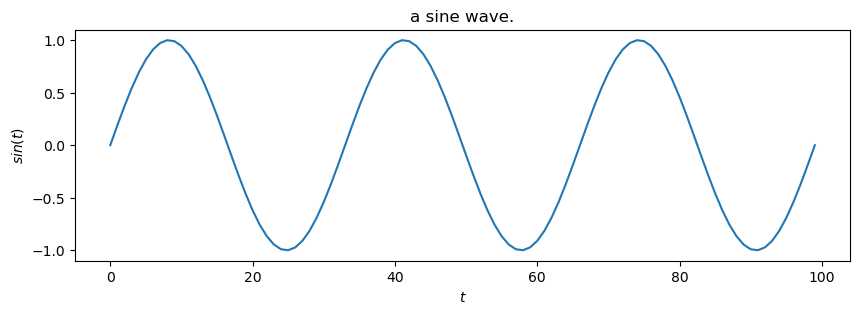

In [4]:
X = np.sin(np.linspace(0, 6*np.pi, 100)).reshape(-1, 1)

plt.figure(figsize=(10, 3))
plt.title("a sine wave.")
plt.ylabel("$sin(t)$")
plt.xlabel("$t$")
plt.plot(X)
plt.show()

In [5]:
states = reservoir.run(X)

In [6]:
from reservoirpy.nodes import Reservoir, Ridge, FORCE, ESN
readout = Ridge(ridge=1e-7)

<function matplotlib.pyplot.show(close=None, block=None)>

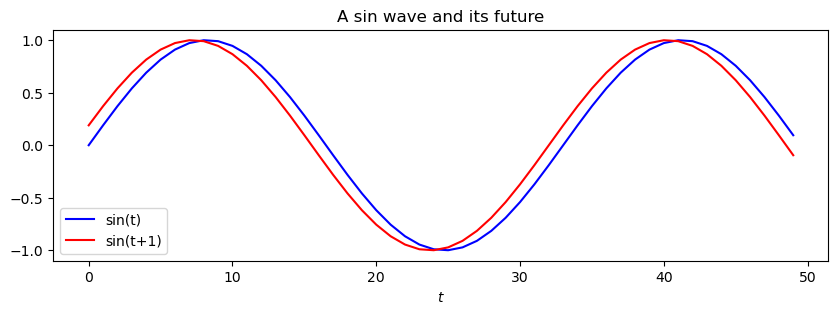

In [7]:
X_train = X[:50]
Y_train = X[1:51]

plt.figure(figsize=(10, 3))
plt.title("A sin wave and its future")
plt.xlabel("$t$")
plt.plot(X_train, label = "sin(t)", color="blue")
plt.plot(Y_train, label="sin(t+1)", color="red")
plt.legend()
plt.show

In [8]:
train_state = reservoir.run(X_train, reset=True)

In [9]:
readout = readout.fit(train_state, Y_train, warmup=10)

<function matplotlib.pyplot.show(close=None, block=None)>

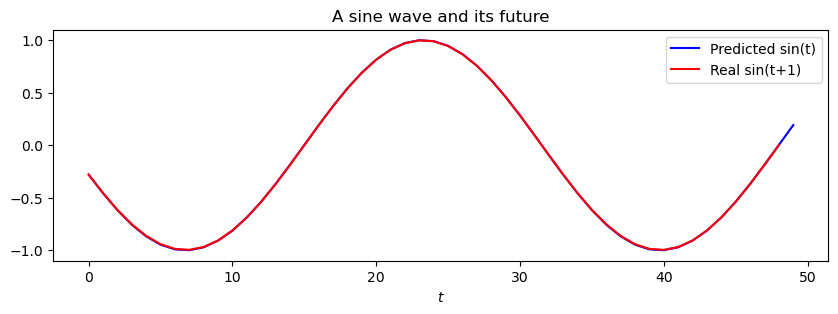

In [10]:
test_states = reservoir.run(X[50:])
Y_pred = readout.run(test_states)

plt.figure(figsize=(10, 3))
plt.title("A sine wave and its future")
plt.xlabel("$t$")
plt.plot(Y_pred, label="Predicted sin(t)", color="blue")
plt.plot(X[51:], label="Real sin(t+1)", color="red")
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

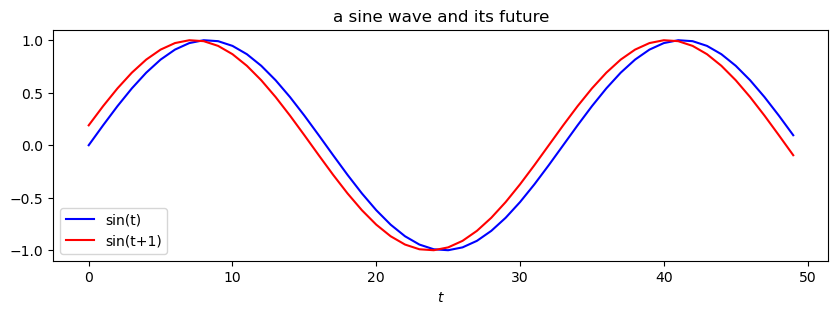

In [11]:
X = np.sin(np.linspace(0, 6*np.pi, 100)).reshape(-1, 1)
X_train = X[:50]
Y_train = X[1:51]

plt.figure(figsize=(10, 3))
plt.title("a sine wave and its future")
plt.xlabel("$t$")
plt.plot(X_train, label="sin(t)", color="blue")
plt.plot(Y_train, label="sin(t+1)", color="red")
plt.legend()
plt.show

In [12]:
train_states = reservoir.run(X_train, reset=True)

In [13]:
readout = readout.fit(train_states, Y_train, warmup=10)

<function matplotlib.pyplot.show(close=None, block=None)>

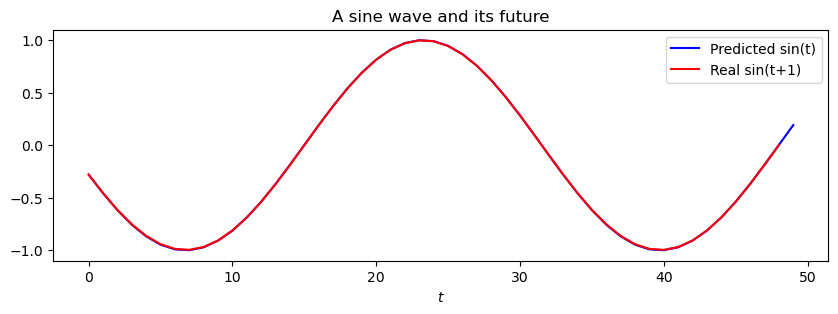

In [14]:
test_states = reservoir.run(X[50:])
Y_pred = readout.run(test_states)

plt.figure(figsize=(10, 3))
plt.title("A sine wave and its future")
plt.xlabel("$t$")
plt.plot(Y_pred, label="Predicted sin(t)", color="blue")
plt.plot(X[51:], label="Real sin(t+1)", color="red")
plt.legend()
plt.show

In [15]:
from reservoirpy.nodes import Reservoir, Ridge

reservoir = Reservoir(100, lr=0.5, sr=0.9)
ridge = Ridge(ridge=1e-7)

esn_model = reservoir >> ridge

In [16]:
esn_model = esn_model.fit(X_train, Y_train, warmup=10)

In [17]:
print(reservoir.is_initialized, readout.is_initialized, readout.fitted)

True True True


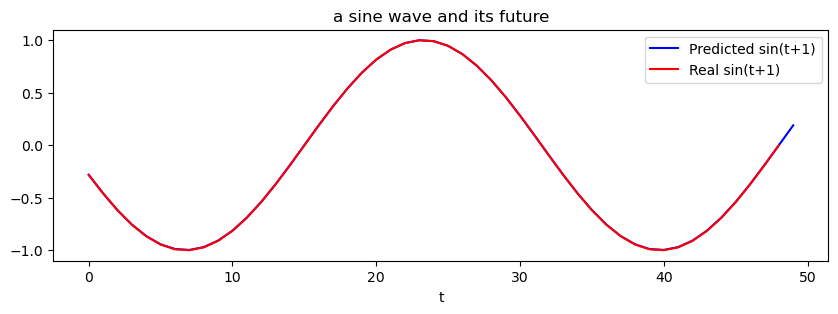

In [18]:
Y_pred = esn_model.run(X[50:])

plt.figure(figsize=(10, 3))
plt.title("a sine wave and its future")
plt.xlabel("t")
plt.plot(Y_pred, label="Predicted sin(t+1)", color="blue")
plt.plot(X[51:], label="Real sin(t+1)", color="red")
plt.legend()
plt.show()

Chapter 3

In [19]:
import matplotlib

from IPython.core.display import HTML
HTML("""
<style>
.img-center {
    display: block;
    margin-left: auto;
    margin-right: auto;
    }
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
    }
</style>
""")

rpy.set_seed(42)

In [20]:
from reservoirpy.datasets import mackey_glass
from reservoirpy.observables import nrmse, rsquare

timesteps = 2510
tau = 17
X = mackey_glass(timesteps, tau=tau)
X = (X - np.mean(X)) / np.std(X) #ここではz-score normalizationを使用。

In [21]:
def plot_mackey_glss(X, sample, tau):
    
    fig = plt.figure(figsize=(10, 3))
    N = sample
    
    ax = plt.subplot((121))
    t = np.linspace(0, N, N)
    for i in range(N-1):
        ax.plot(t[i:i+2], X[i:i+2], color=plt.cm.magma(255*i//N), lw=1.0)
        
    plt.title(f"Time series - {N} timesteps")
    plt.xlabel("$t$")
    plt.ylabel("P(t)")
    
    ax2 = plt.subplot(122)
    ax2.margins(0.05)
    for i in range(N-1):
        ax2.plot(X[i:i+2], X[i+tau: i+tau+2], color=plt.cm.magma(255*i//N), lw=1.0)
    
    plt.title(f"Phase diagram $P(t) = f(P(t-\\tau))$")
    plt.xlabel("$t$")
    plt.ylabel("P(t)")
    
    plt.tight_layout
    plt.show()

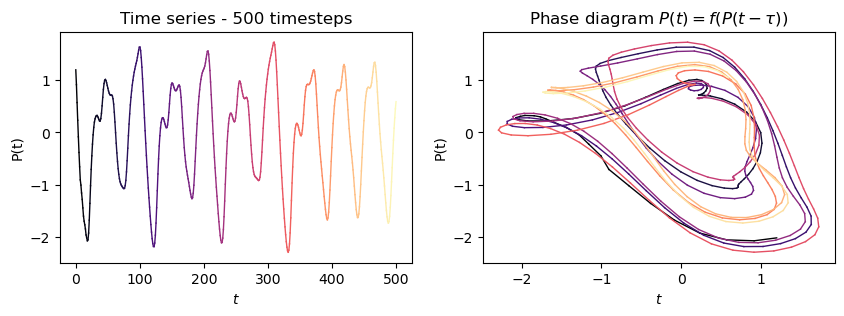

In [22]:
plot_mackey_glss(X, 500, tau)

10 timesteps ahead forecast

In [23]:
def plot_train_test(X_train, Y_train, X_test, Y_test):
    sample = 500
    test_len = X_test.shape[0]
    fig = plt.figure(figsize=(15, 5))
    plt.plot(np.arange(0, 500), X_train[-sample:], label="Training data")
    plt.plot(np.arange(0, 500), Y_train[-sample:], label="Training ground truth")
    plt.plot(np.arange(500, 500+test_len), X_test, label="Testing data")
    plt.plot(np.arange(500, 500+test_len), Y_test, label="Testing ground data")
    plt.legend()
    plt.show

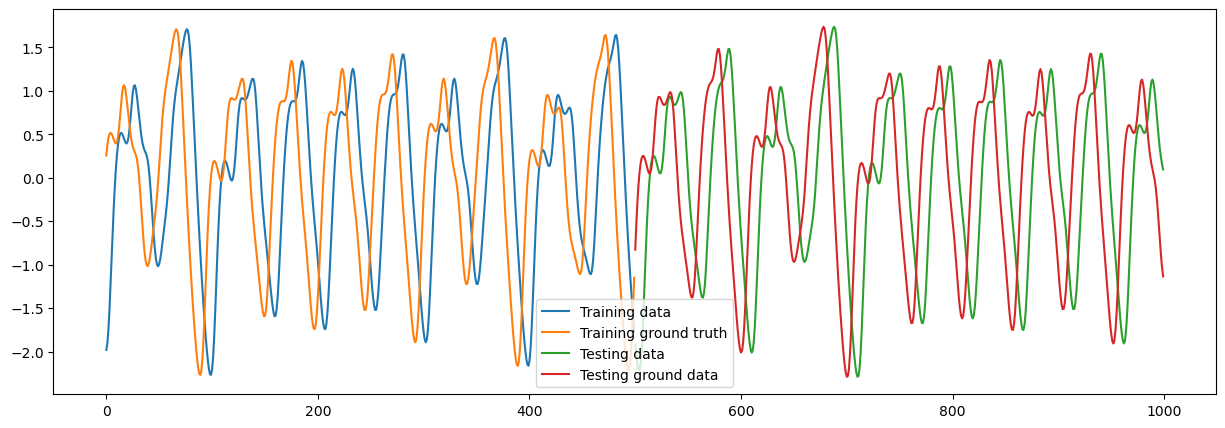

In [24]:
from reservoirpy.datasets import to_forecasting

x, y = to_forecasting(X, forecast=10)
X_train1, Y_train1 = x[:2000], y[:2000]
X_test1, Y_test1 = x[2000:], y[2000:]

plot_train_test(X_train1, Y_train1, X_test1, Y_test1)

In [25]:
units = 100
leak_rate = 0.3
spectral_radius = 1.25
input_scaling = 1.0
connectivity = 0.1
input_connectivity = 0.2
regularization = 1e-8
seed = 1234

In [26]:
def reset_esn():
    from reservoirpy.nodes import Reservoir, Ridge

    reservoir = Reservoir(units, input_scaling=input_scaling, sr=spectral_radius,
                          lr=leak_rate, rc_connectivity=connectivity,
                          input_connectivity=input_connectivity, seed=seed)
    readout   = Ridge(1, ridge=regularization)

    return reservoir >> readout

In [27]:
from reservoirpy.nodes import Reservoir, Ridge

reservoir = Reservoir(units, input_scaling=input_scaling, sr=spectral_radius,
                      lr=leak_rate, rc_connectivity=connectivity,
                      input_connectivity=input_connectivity, seed=seed)

readout   = Ridge(1, ridge=regularization)

esn = reservoir >> readout

In [28]:
Y = esn(X[0]) #warmupは?
reservoir.Win is not None, reservoir.W is not None, readout.Wout is not None

(True, True, True)

In [29]:
np.all(readout.Wout == 0.0) #Trueになるはず、なぜならなかった？

True

In [30]:
esn = esn.fit(X_train1, Y_train1)

In [31]:
def plot_readout(readout):
    Wout = readout.Wout
    bias = readout.bias
    Wout = np.r_[bias, Wout]
    
    fig = plt.figure(figsize=(15, 5))
    
    ax = fig.add_subplot(111)
    ax.grid(axis="y")
    ax.set_ylabel("Coefs. of $W_{out}$")
    ax.set_xlabel("reservoir neurons index")
    ax.bar(np.arange(Wout.size), Wout.ravel()[::-1])
    
    plt.show()

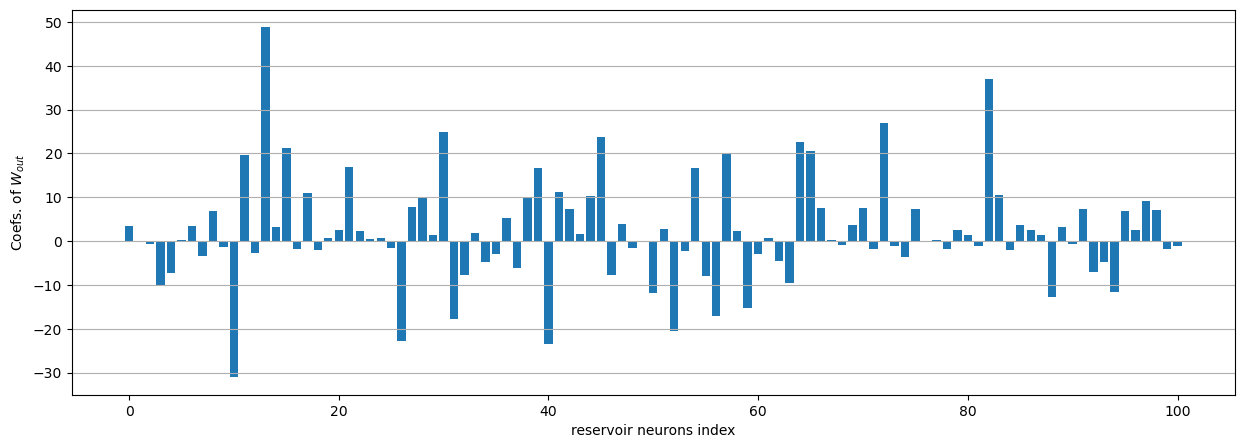

In [32]:
plot_readout(readout)

In [33]:
def plot_results(Y_Pred, Y_test, sample=500):
    
    fig = plt.figure(figsize=(15, 7))
    plt.subplot(211)
    plt.plot(np.arange(sample), Y_Pred[:sample], lw=3, label="ESN prediction")
    plt.plot(np.arange(sample), Y_test[:sample], linestyle = "--", lw=2, label="True Value")
    plt.plot(np.abs(Y_test[:sample] - Y_Pred[:sample]), label = "Absolute Deviation")
    
    plt.legend()
    plt.show()

In [34]:
Y_Pred1 = esn.run(X_test1)

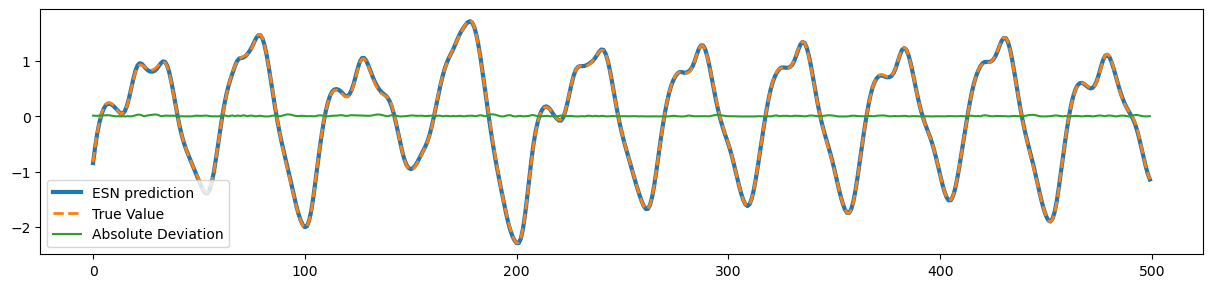

In [35]:
plot_results(Y_Pred1, Y_test1)
#Y_Pref1がESNの結果、Y_test1は(10期先の)target.

In [36]:
rsquare(Y_test1, Y_Pred1), nrmse(Y_test1, Y_Pred1)

(0.9998298506686782, 0.0031137581913412227)

Make the task harder

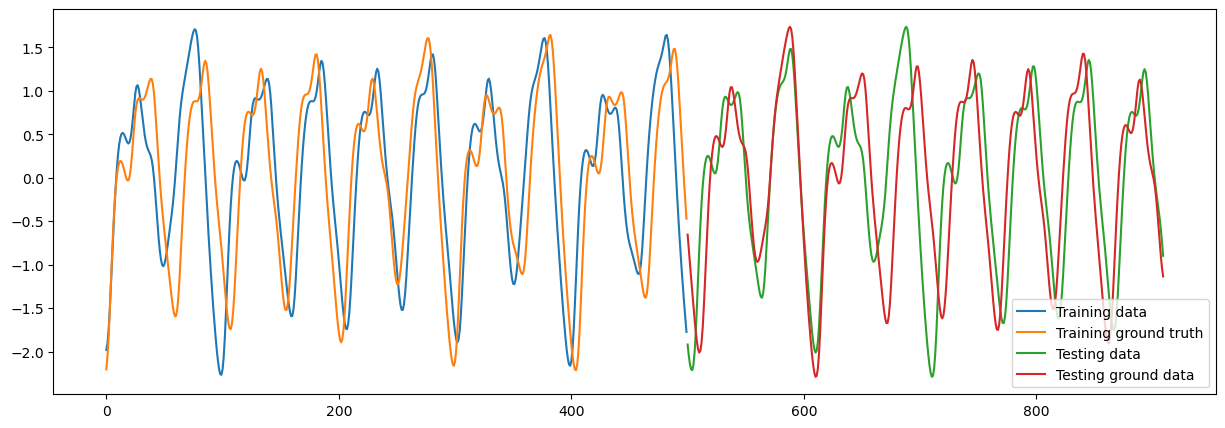

In [37]:
#forecasting horizon of 100 timesの間違い？

x, y = to_forecasting(X, forecast=100) #この時点でyはずれている。
X_train2, Y_train2 = x[:2000], y[:2000]
X_test2, Y_test2 = x[2000:], y[2000:]

plot_train_test(X_train2, Y_train2, X_test2, Y_test2)

In [38]:
Y_pred2 = esn.fit(X_train2, Y_train2).run(X_test2)

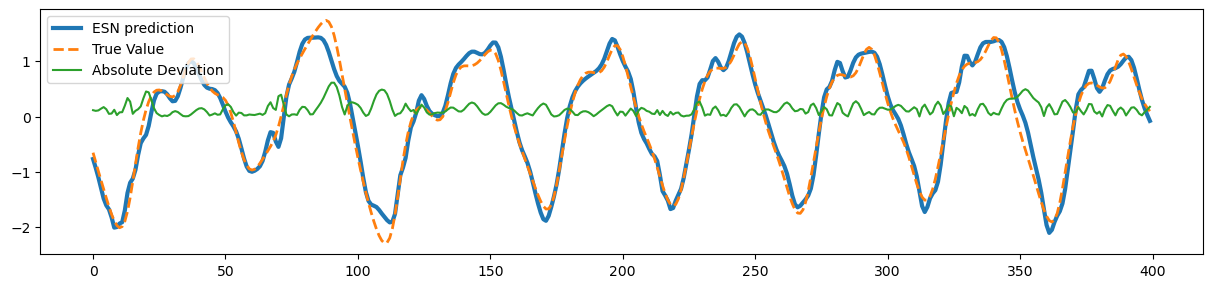

In [39]:
plot_results(Y_pred2, Y_test2, sample=400)

In [40]:
rsquare(Y_test2, Y_pred2), nrmse(Y_test2, Y_pred2)

(0.9675137896462808, 0.044228635363166055)

In [41]:
units = 500
leak_rate = 0.3
spectral_radius = 0.99
input_scaling = 1.0
connectivity = 0.1
input_connectivity = 0.2
regularization = 1e-4
seed = 1234

In [42]:
esn = reset_esn() #ここで使う。

x, y = to_forecasting(X, forecast=1)
X_train3, Y_train3 = x[:2000], y[:2000]
X_test3, Y_test3 = x[2000:], y[2000:]

esn = esn.fit(X_train3, Y_train3)

In [43]:
def plot_generation(X_gen, X_t, nb_generations, warming_out=None, warming_inputs=None, seed_timesteps=0):
    
    plt.figure(figsize=(15,5))
    
    #余熱がある場合はX_genと垂直にスタック。
    if warming_out is not None:
        plt.plot(np.vstack([warming_out, X_gen]), label="Generated timeseries")
    else:
        plt.plot(X_gen, label="Generated timeseries") 
        
    plt.plot(np.arange(nb_generations)+seed_timesteps, X_t, linestyle="--", label="Real timeseries")
    
    if warming_inputs is not None:
        plt.plot(np.arange(seed_timesteps), warming_inputs, linestyle="--", label="warmup")
        
    plt.plot(np.arange(nb_generations)+seed_timesteps, np.abs(X_t - X_gen)) #絶対値の差分を表示

    if seed_timesteps > 0:
        plt.fill_between([0, seed_timesteps], *plt.ylim(), facecolor='lightgray', alpha=0.5, label="Warmup")        
        
    plt.plot([], [], ' ', label=f"$R^2 = {round(rsquare(X_t, X_gen), 4)}$")
    plt.plot([], [], ' ', label=f"$NRMSE = {round(nrmse(X_t, X_gen), 4)}$")
    plt.legend()
    plt.show()

#### Generative mode

- 100 steps of the real timeseries used as warmup.
- 300 steps generated by the reservoir, without external inputs.

いくつかある方法のうちの二つ目

In [44]:
seed_timesteps = 100

warming_inputs = X_test3[:seed_timesteps]

warming_out = esn.run(warming_inputs, reset=True) #最初の100回をwarmupに費やす。論文の場合は10000？

In [45]:
nb_generations = 400

X_gen = np.zeros((nb_generations, 1))
Y = warming_out[-1] #最後の行を追加
for t in range(nb_generations):
    Y = esn(Y)
    X_gen[t, :] = Y

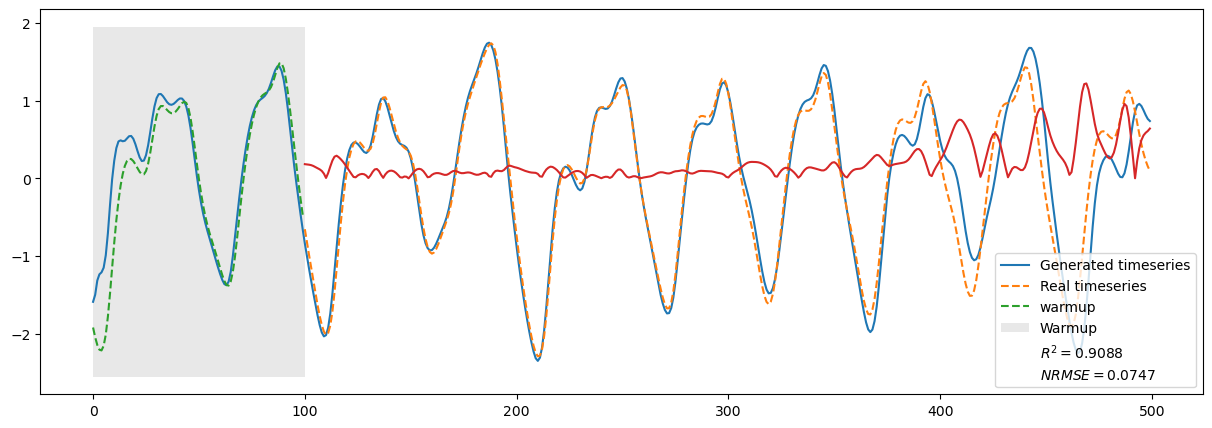

In [46]:
X_t = X_test3[seed_timesteps: nb_generations+seed_timesteps]
plot_generation(X_gen, X_t, nb_generations, warming_out=warming_out,
                warming_inputs=warming_inputs, seed_timesteps=seed_timesteps)

Chapter 3: Online learning

In [47]:
units = 100
leak_rate = 0.3
spectral_radius = 1.25
input_scaling = 1.0
connectivity = 0.1
input_connectivity = 0.2
seed = 1234

In [48]:
from reservoirpy.nodes import FORCE

reservoir = Reservoir(units, input_scaling=input_scaling, sr=spectral_radius,
                      lr=leak_rate, rc_connectivity=connectivity,
                      input_connectivity=input_connectivity, seed=seed)

readout = FORCE(1) #これは何？

esn_online = reservoir >> readout

In [49]:
outputs_pre = np.zeros(X_train1.shape)
for t, (x, y) in enumerate(zip(X_train1, Y_train1)): 
    outputs_pre[t, :] = esn_online.train(x, y)

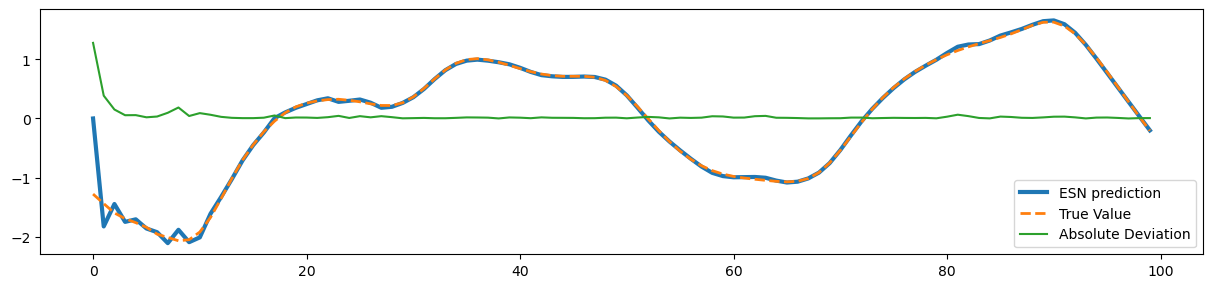

In [50]:
plot_results(outputs_pre, Y_train1, sample=100)

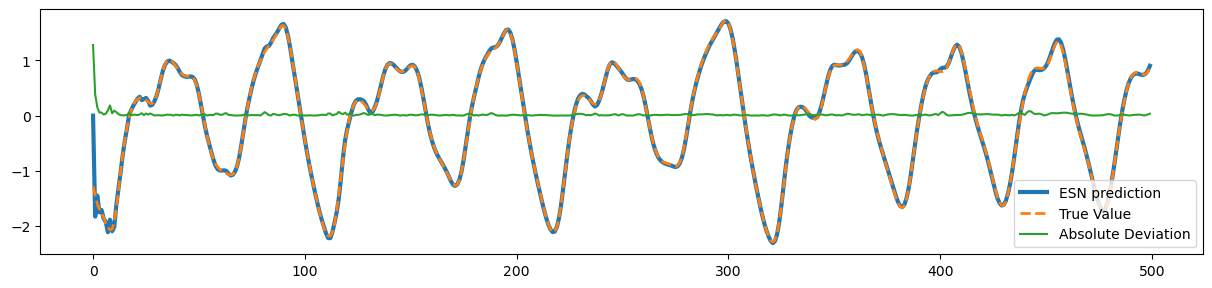

In [51]:
plot_results(outputs_pre, Y_train1, sample=500)

In [52]:
reservoir = Reservoir(units, input_scaling=input_scaling, sr=spectral_radius,
                      lr=leak_rate, rc_connectivity=connectivity,
                      input_connectivity=input_connectivity, seed=seed)

readout   = FORCE(1)


esn_online = reservoir >> readout

In [53]:
esn_online.train(X_train1, Y_train1)

pred_online = esn_online.run(X_test1)  # Wout est maintenant figée

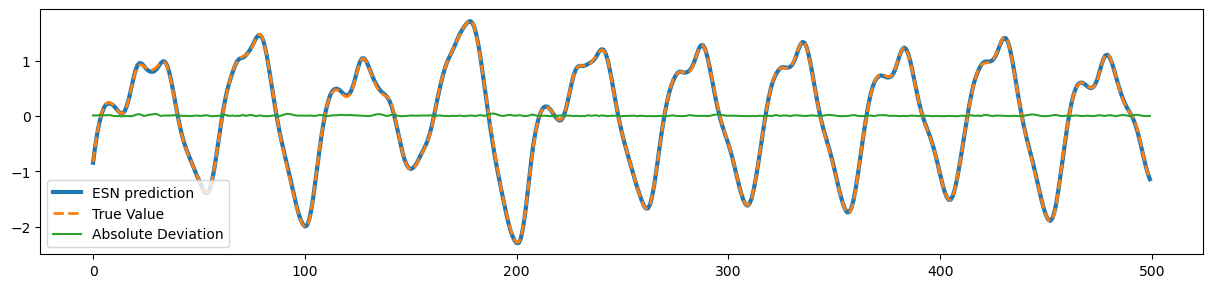

In [54]:
plot_results(pred_online, Y_test1, sample=500)

In [55]:
rsquare(Y_test1, pred_online), nrmse(Y_test1, pred_online)

(0.9997916794537266, 0.0034453695614251128)

Chapter 4

# ここからは、

・Emergence of a resonance in machine learning

の状況設定で数値実験をしてみる。

In [56]:
#パラメータ設定

from reservoirpy.datasets import mackey_glass
from reservoirpy.observables import nrmse, rsquare

tau = 17
timesteps = 200000 
#warmup:10000 timesteps, training: 150000, 
#teseting data(Baysian optimization, short-term prediction) : 900


X = mackey_glass(timesteps, tau=tau)
#ここではz-score normalizationを使用。
X = (X - np.mean(X)) / np.std(X) 

####
残りのパラメータはhyperopt(PythonにおけるBaysian optimization用のライブラリ)を用いて決定する。

In [57]:
#MGをsample = 500で描画、Phase Diagram（横軸X, 縦軸Y）
def plot_mackey_glass(X, sample, tau):

    fig = plt.figure(figsize=(13, 5))
    N = sample

    ax = plt.subplot((121))
    t = np.linspace(0, N, N)
    for i in range(N-1):
        ax.plot(t[i:i+2], X[i:i+2], color=plt.cm.magma(255*i//N), lw=1.0)

    plt.title(f"Timeseries - {N} timesteps")
    plt.xlabel("$t$")
    plt.ylabel("$P(t)$")

    ax2 = plt.subplot((122))
    ax2.margins(0.05)
    for i in range(N-1):
        ax2.plot(X[i:i+2], X[i+tau:i+tau+2], color=plt.cm.magma(255*i//N), lw=1.0)

    plt.title(f"Phase diagram: $P(t) = f(P(t-\\tau))$")
    plt.xlabel("$P(t-\\tau)$")
    plt.ylabel("$P(t)$")

    plt.tight_layout()
    plt.show()

Tutorial Chapter 3では、MGに対するESNの手法がいくつか示されているが、ここではwarmupを用いることができるものを使用したい。
→Generative model

・10000 steps of the real timeseries used as warmup

In [59]:
def plot_generation(X_gen, X_t, nb_generations, warming_out=None, warming_inputs=None, seed_timesteps=0):

    plt.figure(figsize=(15, 5))
    if warming_out is not None:
        plt.plot(np.vstack([warming_out, X_gen]), label="Generated timeseries")
    else:
        plt.plot(X_gen, label="Generated timeseries")

    plt.plot(np.arange(nb_generations)+seed_timesteps, X_t, linestyle="--", label="Real timeseries")

    if warming_inputs is not None:
        plt.plot(np.arange(seed_timesteps), warming_inputs, linestyle="--", label="Warmup")

    plt.plot(np.arange(nb_generations)+seed_timesteps, np.abs(X_t - X_gen),
             label="Absolute deviation")

    if seed_timesteps > 0:
        plt.fill_between([0, seed_timesteps], *plt.ylim(), facecolor='lightgray', alpha=0.5, label="Warmup")

    plt.plot([], [], ' ', label=f"$R^2 = {round(rsquare(X_t, X_gen), 4)}$")
    plt.plot([], [], ' ', label=f"$NRMSE = {round(nrmse(X_t, X_gen), 4)}$")
    plt.legend()
    plt.show()

In [60]:
seed_timesteps = 10000
warming_inputs = X_test3[:seed_timesteps]

